In [24]:
from numpy import pi, sin, cos, power, sqrt
from math import factorial

# !pip install PrettyTable
from prettytable import PrettyTable

import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
a = 0
b = pi
n = int(input('N'))
print(f'a: {a}\nb: {b}\nN: {n}')

def f(x):
    return ((sin(x*cos(2*x)))/(x**2 + 5))**2
    # return sqrt(sin(x)**2/(cos(x)**2 + 2))

def divide_evenly(a, b, len):
    # n-1 bc: | 1 | 2 | 3 | - we divide on 4 points with 3 steps
    step = (b-a)/(len-1)
    return [a+i*step for i in range(len)] 

a: 0
b: 3.141592653589793
N: 10


In [40]:
x_list = divide_evenly(a, b ,n)
y_list = [f(i) for i in x_list]
print(x_list)
print(y_list)

[0.0, 0.3490658503988659, 0.6981317007977318, 1.0471975511965976, 1.3962634015954636, 1.7453292519943295, 2.0943951023931953, 2.443460952792061, 2.792526803190927, 3.141592653589793]
[0.0, 0.0026612985545323765, 0.0004856856522839677, 0.00672606979353648, 0.019350053192414063, 0.01537216994444243, 0.008512453285061887, 0.0014082433203238156, 0.004336219037158784, 6.783016515456898e-35]


In [41]:
def lec_newtonian(x, x_vals, y_vals):
  n = len(x_vals)
  
  def w(k, i):
    w_res = 1
    for j in range(i+1):
      if j != k:
        w_res *= (x_vals[k]-x_vals[j])
    return w_res
  # 
  def A(n):
    a_res = 0
    for i in range(n+1):
      a_res += y_vals[i]/w(i, n)
    return a_res
  # 
  res = A(0)
  for i in range(1, n):
    tmp = 1
    for j in range(i):
      tmp *= (x - x_vals[j])
    res += A(i) * tmp
  return res
  
def wiki_newtonian(x, x_vals, y_vals):
  n = len(x_vals)
  # Интерполяционная формула Ньютона
  # https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8B_%D0%9D%D1%8C%D1%8E%D1%82%D0%BE%D0%BD%D0%B0

  step = x_vals[1] - x_vals[0]

  def delta(p, i):
    if p == 1:
      return y_vals[i] - y_vals[i - 1]
    else:
      return delta(p - 1, i) - delta(p - 1, i - 1)

  def C_j(j):
    if j == 0:
      return y_vals[0]
    else:
      return delta(j, j) / (factorial(j) * power(step, j))

  result = C_j(0)
  for j in range(1, n):
    s = C_j(j)
    for k in range(j):
      s *= x - x_vals[k]
    result += s

  return result

  # http://simenergy.ru/math-analysis/digital-processing/79-newton-polinomial
  # d = 0
  # p = y_vals[0]
  # for j in range(1, n):
    # print('j', j)
    # for i in range(n-j):
      # print('i', i)
      # y_vals[i] = (y_vals[i+1] - y_vals[i])/(x_vals[i+j] - x_vals[i])
    # d *= x - x_vals[j-1]
    # p += y_vals[0]*d
  # return p

# print(newtonian(10, x_list, y_list))

In [42]:
def lagrange(x, x_values, y_values):
    res = 0
    for i, (x_i, y_i) in enumerate(zip(x_values, y_values)):
        mul = 1
        for j, x_j in enumerate(x_values):
            if j != i:
                mul *= (x - x_j) / (x_i - x_j)
            else:
                continue
        res += y_i * mul
    return res

In [43]:
m = int(input('M'))
print(f'm: {m}')

m: 50


In [44]:
xm_list = divide_evenly(a, b, m)
ym_list = [f(i) for i in xm_list]
wnm = [wiki_newtonian(i, x_list, y_list) for i in xm_list]
lnm = [lec_newtonian(i, x_list, y_list) for i in xm_list]
lm = [lagrange(i, x_list, y_list) for i in xm_list]
print(xm_list)
print(ym_list)
print(wnm)
print(lnm)
print(lm)

[0.0, 0.0641141357875468, 0.1282282715750936, 0.19234240736264038, 0.2564565431501872, 0.32057067893773394, 0.38468481472528077, 0.4487989505128276, 0.5129130863003744, 0.5770272220879211, 0.6411413578754679, 0.7052554936630148, 0.7693696294505615, 0.8334837652381083, 0.8975979010256552, 0.9617120368132019, 1.0258261726007487, 1.0899403083882955, 1.1540544441758422, 1.218168579963389, 1.2822827157509358, 1.3463968515384828, 1.4105109873260295, 1.4746251231135763, 1.538739258901123, 1.6028533946886698, 1.6669675304762166, 1.7310816662637634, 1.7951958020513104, 1.8593099378388571, 1.9234240736264039, 1.9875382094139507, 2.0516523452014974, 2.1157664809890444, 2.179880616776591, 2.243994752564138, 2.3081088883516845, 2.3722230241392315, 2.436337159926778, 2.500451295714325, 2.5645654315018716, 2.6286795672894185, 2.6927937030769655, 2.756907838864512, 2.821021974652059, 2.8851361104396056, 2.9492502462271526, 3.013364382014699, 3.077478517802246, 3.141592653589793]
[0.0, 0.00016125300722

In [45]:
table = PrettyTable()

table.field_names = ["x", "f(x)", "P(X)", "L(x)"]

for xm_i, ym_i, lnm_i, lm_i in zip(xm_list, ym_list, lnm, lm):
    table.add_row([xm_i, ym_i, lnm_i, lm_i])
print(table)

+---------------------+------------------------+-------------------------+------------------------+
|          x          |          f(x)          |           P(X)          |          L(x)          |
+---------------------+------------------------+-------------------------+------------------------+
|         0.0         |          0.0           |           0.0           |          0.0           |
|  0.0641141357875468 |  0.000161253007220479  |  -0.014527985057001376  | -0.014527985057001327  |
|  0.1282282715750936 | 0.0006082265534836332  |  -0.015477599715823694  | -0.015477599715823635  |
| 0.19234240736264038 | 0.0012396014756690444  |  -0.010522544541178677  |  -0.01052254454117867  |
|  0.2564565431501872 | 0.0019135957690836717  |  -0.004238404557894031  | -0.004238404557894024  |
| 0.32057067893773394 | 0.0024795555239464475  |  0.0009741775177040814  | 0.0009741775177040897  |
| 0.38468481472528077 | 0.0028088236284529444  |   0.004168715817041329  |  0.004168715817041327  |


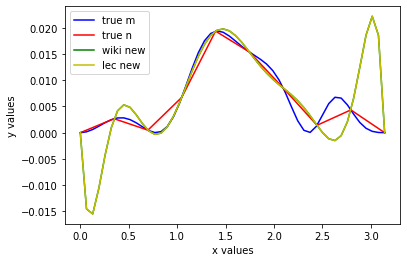

In [46]:
plt.plot(xm_list, ym_list, color='b', label='true m')
plt.plot(x_list, y_list, color='r', label='true n')
plt.plot(xm_list, wnm, color='g', label='wiki new')
plt.plot(xm_list, lnm, color='y', label='lec new')
# plt.plot(xm_list, lm, color='y', label='lag inter')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend(loc='best')